##**★ 다음과 같이 작성해보세요.**
- 다음과 같이 검색하여 파일을 생성합니다. 파일이름은 임의로 설정합니다.
 - 기상자료개발포털 : http://data.kma.go.kr --> '기후통계분석' --> '통계분석' --> '조건별 통계'
 - 지역/지점 : *조별 지정된 지역 선택*
 - 기간 : 일, 2010 ~ 2023
 - 월 : 1 ~ 12, 일 : 1 ~ 31

###**1. 데이터 불러오기**

In [2]:
import pandas as pd

temp = pd.read_csv(r"..\..\data\extremum_20240626150332 1.csv", encoding='EUC-KR')
temp.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,\t\t108,서울,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,\t\t108,서울,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,\t\t108,서울,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,\t\t108,서울,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,\t\t108,서울,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


###**2. 데이터 셋 재조정**
 - 지점번호, 지점명을 제외한 데이터만 가져오기<br>
   - 변수명 = 변수명.loc[행레이블,열레이블]
 - 열이름 변경
    - 변수명.columns=['열이름', '열이름', ....]

In [31]:
# 지점번호, 지점명을 제외한 데이터만 data 변수로 저장
# 데이터프레임 변수 data의 열번호 변경 ==> '일시','평균기온','최고기온','최고기온시각','최저기온','최조기온시각','일교차'

data = temp.loc[:,'일시':]
data.columns = ['일시','평균기온','최고기온','최고기온시각','최저기온','최저기온시각','일교차']
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5113 non-null   object 
 1   평균기온    5113 non-null   float64
 2   최고기온    5112 non-null   float64
 3   최고기온시각  5112 non-null   object 
 4   최저기온    5112 non-null   float64
 5   최저기온시각  5112 non-null   object 
 6   일교차     5111 non-null   float64
dtypes: float64(4), object(3)
memory usage: 280.2+ KB


###**3. 결측값 확인**
- 결측값 개수 확인 : 변수명.isnull().sum()
- 결측값 데이터 확인 : 변수명[변수명['컬럼명'].isnull( )]

In [32]:
# 결측값 개수 확인

data.isnull()

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5116,True,True,True,True,True,True,True
5117,True,True,True,True,True,True,True
5118,True,True,True,True,True,True,True
5119,True,True,True,True,True,True,True


In [33]:
# 결측값 데이터 확인

data.isnull().sum()

일시         8
평균기온       8
최고기온       9
최고기온시각     9
최저기온       9
최저기온시각     9
일교차       10
dtype: int64

###**4. 결측값 행/열 삭제**
- 결측값이 들어있는 행 전체 삭제하기 : 변수명.dropna(axis=0)
- 결측값이 들어있는 열 전체 삭제하기 : 변수명.dropna(axis=1)


In [34]:
# 결측값 행 전체 삭제

# data.dropna(axis=0)

data = data.dropna(axis=0)

In [35]:
# 기본 정보 확인

data.info()
# 5121 -> 5111 entries

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
dtypes: float64(4), object(3)
memory usage: 319.4+ KB


###**5-1. 최고기온과 해당 날짜 출력**
- ⓐ 최고기온 계산 : '최고기온' 컬럼에서 최대값 계산(max() 함수)
 - hint : 변수명['컬럼명'].max( )
- '최고기온' 컬럼에서 'ⓐ 계산된 최고기온'과 같은 데이터 검색
 - hint : 변수명[변수명['컬럼명'] == 비교값] [ ['컬럼명1', '컬럼명2', ....] ]
- index 재조정 : 변수명.reset_index( )
- '날짜', '최고온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최고 기온이 가장 높았던 날은 0000-00-00 로 00.0도 였습니다.
```



In [40]:
# '최고기온' 컬럼에서 '계산된 최고기온'과 같은 데이터 검색하여 maxData 변수에 저장
# maxData 데이터프레임의 index 초기화
# maxData 데이터프레임에서 '일시'와 '최고기온' 출력 - 변수명.loc[0,열이름]

data.loc[(data['최고기온'] == data['최고기온'].max()),['일시','평균기온','최고기온','최저기온','일교차']]
# df.loc[조건, 가져오려는 컬럼]

,일시,평균기온,최고기온,최저기온,일교차
3134,2018-08-01,33.6,39.6,27.8,11.8


In [53]:
maxData = data.loc[(data['최고기온'] == data['최고기온'].max()),['일시','평균기온','최고기온','최저기온','일교차']]
maxData = maxData.reset_index()
maxData
print('서울 지역에서 최고 기온이 가능 높았던 날은 ',  maxData.loc[0,'일시'] , '로', maxData.loc[0,'최고기온'], '도 였습니다.')

서울 지역에서 최고 기온이 가능 높았던 날은  2018-08-01 로 39.6 도 였습니다.


###**5-2. 최저기온와 해당 날짜 출력**
- ⓑ 최저기온 계산 : '최저기온' 컬럼에서 최소값 계산(min() 함수)
- '최저기온' 컬럼에서 'ⓑ 계산된 최저기온'과 같은 데이터 검색
- index 재조정 : 변수명.reset_index( )
- '날짜', '최저온도' 컬럼 출력 : 변수명.loc[행레이블,열레이블]

```
[출력결과]
00 지역에서 최저 기온이 가장 낮았던 날은 0000-00-00 로 00.0도 였습니다.
```

In [54]:
# '최저기온' 컬럼에서 '계산된 최저기온'과 같은 데이터 검색하여 minData 변수에 저장
# minData 데이터프레임의 index 초기화
# minData 데이터프레임에서 '일시'와 '최저기온' 출력 - 변수명.loc[0,열이름]

minData = data.loc[(data['최저기온'] == data['최저기온'].min()),['일시','평균기온','최고기온','최저기온','일교차']]
minData = minData.reset_index()
minData
print('서울 지역에서 최고 기온이 가능 낮았던 날은 ',  minData.loc[0,'일시'] , '로', minData.loc[0,'최저기온'], '도 였습니다.')

서울 지역에서 최고 기온이 가능 낮았던 날은  2021-01-08 로 -18.6 도 였습니다.


###**7. 본인 생일 날짜의 기온 변화 그래프 작성**
- **1단계 : '일시' 열에서 '년'만, '월-일'만 추출하여 새로운 열 생성**
 - 인덱싱 : 변수명['컬럼명'].str[ ]
 - '년도' 열 생성 : '일시' 컬럼의 값에서 앞 4자리까지만 추출 ==> data['년도'] = data['일시'].str[ :4 ]
 - '날짜' 열 생성 : '일시' 컬럼의 값에서 5자리부터 끝까지만 추출 ==> data['날짜'] = data['일시'].str[ 5: ]

- **2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색**
- **3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 변화 꺽은선 그래프 작성**
  - 차트 크기 : plt.figure(figsize=(가로, 세로)), 단위:inch
  - 차트 제목 : plt.title("제목")
  - 차트 범례 : plt.legend( )
  - 차트 보여주기 : plt.show( )

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
dtypes: float64(4), object(3)
memory usage: 319.4+ KB


In [56]:
data.head()

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3


In [57]:
# 한글 폰트 설치
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [61]:
# 1단계 : '일시' 열에서 새로운 열 '년도'과 '날짜'열 생성

data['년도'] = data['일시'].str[:4] # 처음부터 3개까지 자르겠다.
data['날짜'] = data['일시'].str[5:] # 5부터 끝까지
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
 7   년도      5111 non-null   object 
 8   날짜      5111 non-null   object 
dtypes: float64(4), object(5)
memory usage: 399.3+ KB


,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1,2010,01-01
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6,2010,01-02
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3,2010,01-03
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6,2010,01-04
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3,2010,01-05


In [65]:
# '년도' 컬럼을 숫자 정수형으로 변환
data['년도'] = data['년도'].astype(int)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5111 entries, 0 to 5112
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      5111 non-null   object 
 1   평균기온    5111 non-null   float64
 2   최고기온    5111 non-null   float64
 3   최고기온시각  5111 non-null   object 
 4   최저기온    5111 non-null   float64
 5   최저기온시각  5111 non-null   object 
 6   일교차     5111 non-null   float64
 7   년도      5111 non-null   int64  
 8   날짜      5111 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 399.3+ KB


,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
0,2010-01-01,-7.6,-3.6,15:01,-12.7,6:54,9.1,2010,01-01
1,2010-01-02,-3.6,0.2,15:24,-7.4,23:59,7.6,2010,01-02
2,2010-01-03,-6.8,-3.2,14:38,-10.5,7:48,7.3,2010,01-03
3,2010-01-04,-5.9,-3.4,14:25,-8.0,24:00:00,4.6,2010,01-04
4,2010-01-05,-9.9,-7.0,15:06,-12.3,23:33,5.3,2010,01-05


In [90]:
# 연도별 평균기온 - 1. 그릅화 2. 피벗테이블

data.groupby('년도')['평균기온'].mean()

년도
2010    12.140822
2011    12.082192
2012    12.268579
2013    12.563562
2014    13.400274
2015    13.621918
2016    13.592896
2017    13.077747
2018    13.002466
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.259066
2023    14.109041
Name: 평균기온, dtype: float64

In [78]:
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import matplotlib.pyplot as plt

# 연도별 평균기온의 평균계산
# data.groupby('년도')[['평균기온']].mean() # []를 사용하면 데이타 프레임형삭으로 컴버트됨
meanDAta = data.groupby('년도')[['평균기온']].mean() 
meanDAta


,평균기온
년도,
2010,12.140822
2011,12.082192
2012,12.268579
2013,12.563562
2014,13.400274
2015,13.621918
2016,13.592896
2017,13.077747
2018,13.002466


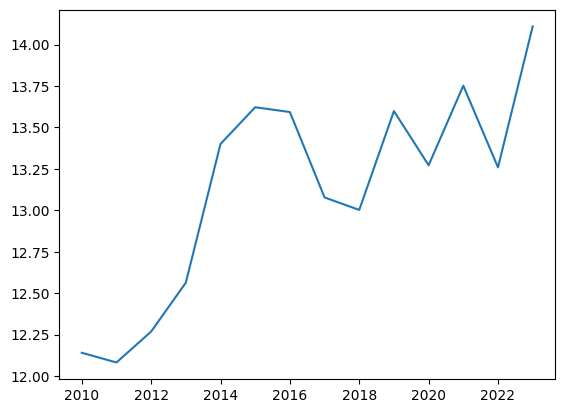

In [92]:
# 차트그리기
plt.plot(meanDAta)
plt.show()

In [86]:
# 2단계 : 생성된 '날짜'열 값에서 본인 생일과 동일한 날짜 검색하여 birthData 변수에 저장
# 예: data[data['날짜']=='10-01']

birthdata = data.loc[data['날짜'] == '01-24']
birthdata

,일시,평균기온,최고기온,최고기온시각,최저기온,최저기온시각,일교차,년도,날짜
23,2010-01-24,0.3,3.8,13:22,-4.5,0:00,8.3,2010,01-24
388,2011-01-24,-8.8,-5.8,13:24,-10.9,8:12,5.1,2011,01-24
753,2012-01-24,-7.3,-3.1,15:55,-11.8,6:07,8.7,2012,01-24
1119,2013-01-24,-0.9,2.4,11:26,-6.7,23:56,9.1,2013,01-24
1484,2014-01-24,3.0,5.7,15:43,-1.1,0:01,6.8,2014,01-24
1849,2015-01-24,3.7,8.4,14:40,0.8,7:31,7.6,2015,01-24
2214,2016-01-24,-14.4,-10.5,16:20,-18.0,7:30,7.5,2016,01-24
2580,2017-01-24,-7.0,-1.3,15:30,-11.6,4:19,10.3,2017,01-24
2945,2018-01-24,-14.2,-10.7,14:22,-16.3,7:46,5.6,2018,01-24
3310,2019-01-24,0.1,6.5,14:46,-4.6,8:06,11.1,2019,01-24


In [94]:
# 내 생일 날짜 중에서 최고 기온인 연도는?

maxBirthdata = birthdata.loc[(birthdata['최고기온'] == birthdata['최고기온'].max()),['일시','평균기온','최고기온','최저기온','일교차','년도','날짜']]
maxBirthdata['년도']

maxBirthdata = birthdata.loc[(birthdata['최고기온'] == birthdata['최고기온'].max()),['년도']]
maxBirthdata



,년도
4041,2021


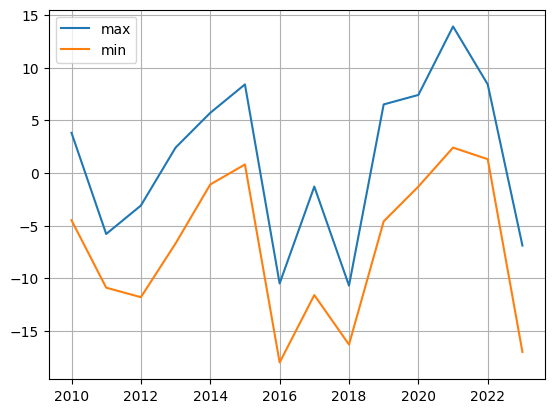

In [99]:
# 3단계 :'년도(2010 ~ 2023)'별로 '최고기온'과 '최저기온' 꺽은선 그래프 작성, birthData 변수 이용
# 차트 사이즈 : 가로 - 12 inch, 세로 - 10 inch



# 차트그리기
plt.plot(birthdata['년도'], birthdata['최고기온'], label = 'max') # (X축, Y축)
plt.plot(birthdata['년도'], birthdata['최저기온'], label = 'min') # (X축, Y축)
plt.grid()
plt.legend()
plt.show()
